<a href="https://colab.research.google.com/github/xuxiufeng/Blockchain_Simulation_Multiple_Hackers_with_Resetting_Times/blob/main/Probability_Gamma_Weibull_Gamma.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import weibull_min

In [4]:
k = 7

In [5]:
eta_list = [0.31692439, 0.22665998, 0.23984366, 0.29469367, 0.25199636,
        0.30690478, 0.22352072]
delta_list = [0.2047781 , 0.17509415, 0.2722517 , 0.19205438, 0.19631845,
        0.2746425 , 0.33089488]

In [6]:
def Generate_Z(m, eta_list, delta_list):
    sum_of_x_list = []
    for i in range(len(eta_list)):
        sum_of_x_list.append(np.sum(np.random.gamma(eta_list[i], 1/delta_list[i], m)))
    Z = min(sum_of_x_list)
    return Z
def T_m(m, eta_list, delta_list, alpha, beta, theta, tau):
    sum_of_time = 0
    sum_of_w = 0
    y = weibull_min.rvs(c=beta, scale=alpha)
    w = np.random.gamma(theta, 1/tau)
    Z_m = Generate_Z(m, eta_list, delta_list)
    while Z_m > y:
        sum_of_time = sum_of_time + y + w
        sum_of_w += w
        Z_m = Generate_Z(m, eta_list, delta_list)
        y = weibull_min.rvs(c=beta, scale=alpha)
        w = np.random.gamma(theta, 1/tau)
    return sum_of_time + Z_m, sum_of_w



In [9]:
def P_mt1(t, m_list, eta_list, delta_list, alpha, beta, theta, tau, N=150): # 10000
    res = np.repeat(np.nan, N)
    Prob = np.repeat(np.nan, len(m_list))
    for i in range(len(m_list)):
        for j in range(N):
             res[j] = t < T_m(m_list[i], eta_list, delta_list, alpha, beta, theta, tau)[0]
        Prob[i] = np.sum(res)/N
        print('m = ', i+1)
    return Prob


m =  1
m =  2
m =  3
m =  4
m =  5
m =  6
m =  7
m =  8
m =  9
m =  10
m =  11
m =  12
m =  13
m =  14
m =  15
m =  16
m =  17
m =  18
m =  19
m =  20
m =  21
m =  22
m =  23
m =  24
m =  25
m =  26
m =  27
m =  28
m =  29
m =  30
m =  31
m =  32
m =  33
m =  34
m =  35
m =  36
m =  37
m =  38
m =  39
m =  40


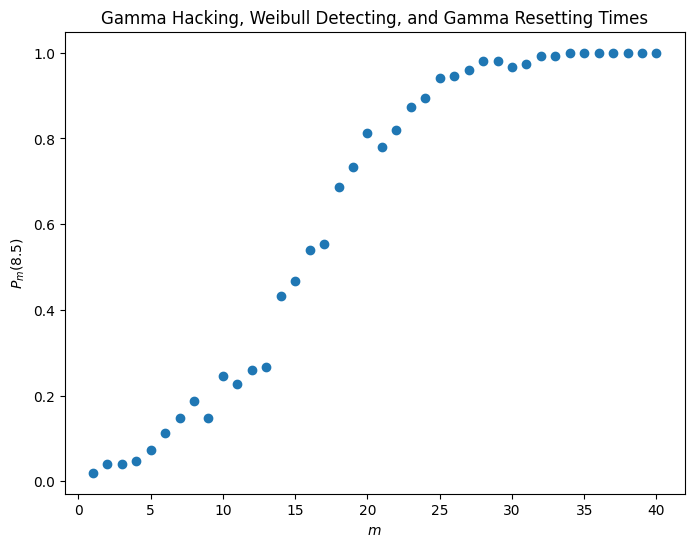

In [18]:
m = 40
m_list = range(1, m+1)
alpha = 1/10
beta = 1/13
theta = 1/5
tau = 1/4
t_cross_section = 8.5
P_mt = P_mt1(t_cross_section, m_list, eta_list, delta_list, alpha, beta, theta, tau)
fig = plt.figure(figsize=(8, 6))
plt.scatter(m_list, P_mt)
plt.xlabel(r'$m$')
plt.ylabel(r'$P_m(8.5)$')
plt.title('Gamma Hacking, Weibull Detecting, and Gamma Resetting Times')
plt.show()

# 3D

In [14]:
def P_mt2(t, m, eta_list, delta_list, alpha, beta, theta, tau, N=100): # N: iterations
    res = np.repeat(np.nan, N)
    for j in range(N):
        res[j] = t < T_m(m, eta_list, delta_list, alpha, beta, theta, tau)[0]
    Prob = np.sum(res)/N
    return Prob

In [15]:

t = np.array(np.linspace(0.1, 10, len(m_list)))
m_axis = np.repeat(np.nan, len(m_list)*len(t))
t_axis = np.repeat(np.nan, len(m_list)*len(t))
P_axis = np.repeat(np.nan, len(m_list)*len(t))
index = 0
for i in range(len(m_list)):
    for j in range(len(t)):
        m_axis[index] = m_list[i]
        t_axis[index] = t[j]
        P_axis[index] = P_mt2(t_axis[index], int(m_axis[index]), eta_list, delta_list, alpha, beta, theta, tau)
        index += 1
    print(i+1)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40


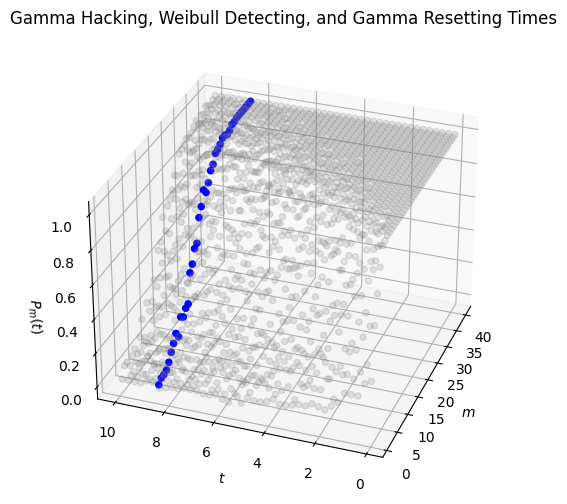

In [19]:

fig = plt.figure(figsize=(8, 6))
ax = plt.axes(projection='3d')
ax.scatter3D(m_axis, t_axis, P_axis, alpha=0.2, c='grey')
ax.scatter3D(m_list, np.repeat(t_cross_section, len(m_list)), P_mt, alpha=1, c='blue')
ax.view_init(30, 200)
ax.set_yticks(np.linspace(0, 10, 6))
ax.set_xlabel('$m$')
ax.set_ylabel('$t$')
ax.set_zlabel(r'$P_m(t)$')
ax.set_title('Gamma Hacking, Weibull Detecting, and Gamma Resetting Times')
plt.show()
